# Volume I: Data Visualization. Solutions File.

In [8]:
import numpy as np
from matplotlib import rcParams, pyplot as plt
rcParams["figure.figsize"] = (12,8)

%matplotlib notebook

<IPython.core.display.Javascript object>


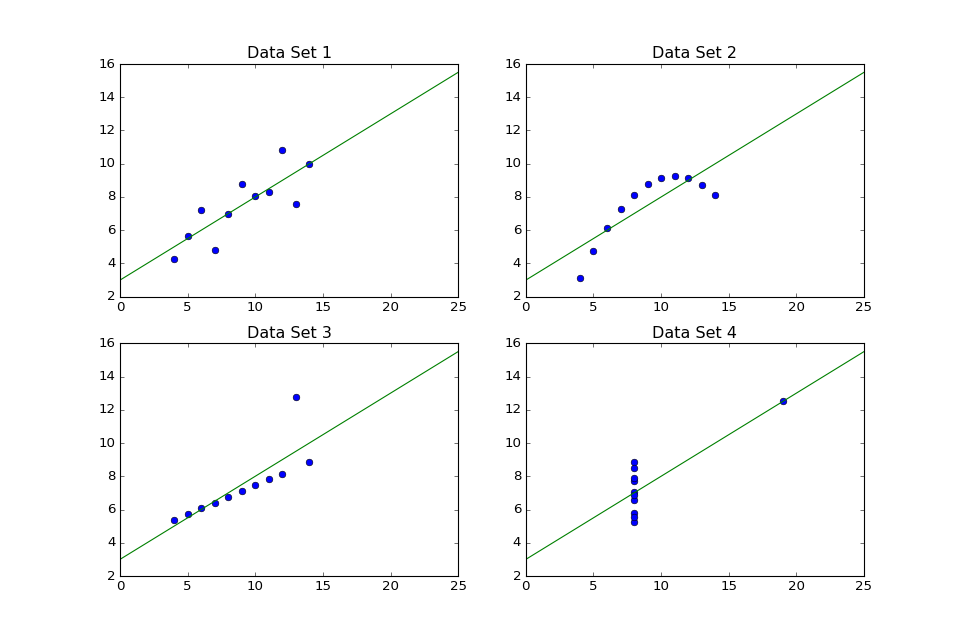

In [10]:
# Problem 1

A = np.load("anscombe.npy")
x = np.linspace(0,25,200)
y = .5*x + 3
for i in xrange(4):
    plt.subplot(2,2,i+1)
    plt.plot(A[:,2*i], A[:,2*i+1], 'o')
    plt.plot(x,y)
    plt.title("Data Set {}".format(i+1))

**Data Set 1**: Randomly scattered around the regression line. The $x$-coordinates appear uniformly distributed.

**Data Set 2**: Parabolic, not linear. The $x$-values are nearly perfectly spaced.

**Data Set 3**: Linear, very close to the regression line. A single vertical outlier skews the regression.

**Data Set 4**: Linear. A single horizontal outlier skews the regression, but the rest of the points all have the same $x$-coordinate.